# Load


In [695]:
import os
import numpy as np
import pandas as pd
import rasterio
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, UpSampling2D, concatenate, Input, BatchNormalization, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import rasterio


我的输入数据是这样的，有很多个csv文件代表同一张512*512图的15个计算值（double），每个值代表一个像素，这个是x（但是我有很多这样的图），我的y是一个csv，每个数字代表一个512*512像素的分类，有0123，也就是说一个像素点可能会有四种分类。怎么放入inceptionV3？

但是你的X和Y仅仅是我一张图片的，我有很多图片呢
现在我读取完成文件之后X.shape= (n, 15, 512, 512)y.shape=(n, 512, 512)，n是图片数量，每一张图片都是512*512像素，x是15个通道，基于这个给我写一下模型构造和训练

In [696]:
def load_tif(file_path):
    print(f"Loading TIF file from {file_path}")
    with rasterio.open(file_path) as src:
        image = src.read(1).astype(np.float32)
    return image

In [697]:
import os
import re

base_path = 'testset'
pattern = re.compile(r'smalldata_(\d+)_(\d+)')  # 正则表达式匹配 smalldata_ 后面的两个数字
indices = ['ExG', 'ExR', 'PRI', 'MGRVI', 'SAVI', 'MSAVI', 'EVI', 'REIP', 'NDVI', 'GNDVI', 'CI', 'OSAVI', 'TVI', 'MCARI', 'TCARI']

def read_X(dir=base_path,indices=indices):
    images=[]
    labels=[]
    for root, dirs, files in os.walk(dir):
        for dir_name in dirs:
            match = pattern.match(dir_name)
            if match:
                # 提取 smalldata_ 后面的数字
                group_number = match.group(1)
                sub_group_number = match.group(2)
                dir_path = os.path.join(root, dir_name)
                print(f"Processing folder: {dir_path} (Group: {group_number}, Sub-group: {sub_group_number})")
                channels = []
                for file_name in os.listdir(dir_path):
                    if file_name.endswith('.tif'):
                        for index in indices:
                            if file_name.startswith(index):
                                print(f"Processing file: {file_name} with feature: {index}")
                                # 创建多通道图像
                                
                                # 在这里进行进一步的文件处理
                                # 例如，可以读取 CSV 文件并执行某些操作
                                file_path = os.path.join(dir_path, file_name)
                                channels.append(load_tif(file_path))

                                # 读取CSV文件的示例代码
                                # import pandas as pd
                                # df = pd.read_csv(file_path)
                                # channels.append(df)  # 假设你要将数据添加到 channels 列表中
                         
                         
                    if file_name.startswith("label_matrix"):
                        file_path = os.path.join(dir_path, file_name)
                        label_matrix = pd.read_csv(file_path, header=None).values
                        

                                   
                images.append(channels)
                labels.append(label_matrix)
    return np.array(images), np.array(labels)                     


In [698]:
X,y=read_X()

Processing folder: testset/smalldata_3_3 (Group: 3, Sub-group: 3)
Processing file: TVI_3_3.tif with feature: TVI
Loading TIF file from testset/smalldata_3_3/TVI_3_3.tif
Processing file: REIP_3_3.tif with feature: REIP
Loading TIF file from testset/smalldata_3_3/REIP_3_3.tif
Processing file: PRI_3_3.tif with feature: PRI
Loading TIF file from testset/smalldata_3_3/PRI_3_3.tif
Processing file: OSAVI_3_3.tif with feature: OSAVI
Loading TIF file from testset/smalldata_3_3/OSAVI_3_3.tif
Processing file: MSAVI_3_3.tif with feature: MSAVI
Loading TIF file from testset/smalldata_3_3/MSAVI_3_3.tif
Processing file: EVI_3_3.tif with feature: EVI
Loading TIF file from testset/smalldata_3_3/EVI_3_3.tif
Processing file: MCARI_3_3.tif with feature: MCARI
Loading TIF file from testset/smalldata_3_3/MCARI_3_3.tif
Processing file: MGRVI_3_3.tif with feature: MGRVI
Loading TIF file from testset/smalldata_3_3/MGRVI_3_3.tif
Processing file: ExG_3_3.tif with feature: ExG
Loading TIF file from testset/smalld

# 448*448（不再需要）

In [178]:
!brew install gdal



15076.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:86ff822590529e8e9093cdc1702a1d3321678c85347d30f82db4f993db8f9eb1
######################################################################### 100.0%
==> Pouring portable-ruby-3.3.1.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
gorilla-cli     iamb            mactop          mihomo          ronn-ng
==> New Casks
chime                                    quicktune
little-snitch@5                          screaming-frog-log-file-analyser
quick-app-ide

You have 11 outdated formulae installed.

==> Downloading https://ghcr.io/v2/homebrew/core/gdal/manifests/3.9.0_1
######################################################################### 100.0%
=

In [182]:
import os
import re
import numpy as np
import pandas as pd
# from osgeo import gdal

base_path = 'test1'
pattern = re.compile(r'smalldata_(\d+)_(\d+)')  # 正则表达式匹配 smalldata_ 后面的两个数字
indices = ['ExG', 'ExR', 'PRI', 'MGRVI', 'SAVI', 'MSAVI', 'EVI', 'REIP', 'NDVI', 'GNDVI', 'CI', 'OSAVI', 'TVI', 'MCARI', 'TCARI']

def load_tif(file_path, size=(448, 448)):
    dataset = gdal.Open(file_path)
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray(0, 0, size[0], size[1])
    return data

def read_X_448(dir=base_path, indices=indices):
    images = []
    labels = []
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            match = pattern.match(dir_name)
            if match:
                # 提取 smalldata_ 后面的数字
                group_number = match.group(1)
                sub_group_number = match.group(2)
                dir_path = os.path.join(root, dir_name)
                print(f"Processing folder: {dir_path} (Group: {group_number}, Sub-group: {sub_group_number})")
                channels = []
                for file_name in os.listdir(dir_path):
                    if file_name.endswith('.csv'):
                        for index in indices:
                            if file_name.startswith(index):
                                print(f"Processing file: {file_name} with feature: {index}")
                                file_path = os.path.join(dir_path, file_name)
                                # 读取前448x448个像素
                                channel_data = pd.read_csv(file_path, header=None).values
                                # 只提取前448x448个像素的标签
                                channel_data = channel_data[:448, :448]


                                # channel_data = load_tif(file_path)
                                channels.append(channel_data)
                    if file_name.startswith("label_matrix"):
                        file_path = os.path.join(dir_path, file_name)
                        label_matrix = pd.read_csv(file_path, header=None).values
                        # 只提取前448x448个像素的标签
                        label_matrix = label_matrix[:448, :448]
                images.append(channels)
                labels.append(label_matrix)
    return np.array(images), np.array(labels)

# Example usage



In [186]:
X, y = read_X_448()


Processing folder: test1/smalldata_3_3 (Group: 3, Sub-group: 3)
Processing file: MCARI_3_3.csv with feature: MCARI
Processing file: EVI_3_3.csv with feature: EVI
Processing file: MSAVI_3_3.csv with feature: MSAVI
Processing file: GNDVI_3_3.csv with feature: GNDVI
Processing file: SAVI_3_3.csv with feature: SAVI
Processing file: TCARI_3_3.csv with feature: TCARI
Processing file: CI_3_3.csv with feature: CI
Processing file: NDVI_3_3.csv with feature: NDVI
Processing file: ExR_3_3.csv with feature: ExR
Processing file: ExG_3_3.csv with feature: ExG
Processing file: MGRVI_3_3.csv with feature: MGRVI
Processing file: TVI_3_3.csv with feature: TVI
Processing file: REIP_3_3.csv with feature: REIP
Processing file: PRI_3_3.csv with feature: PRI
Processing file: OSAVI_3_3.csv with feature: OSAVI


# Helper

In [699]:
def convert_to_one_hot(y):
    # 获取输入数组的形状
    n, h, w = y.shape
    
    # 初始化一个形状为 (n, h, w, 4) 的全零数组
    y_one_hot = np.zeros((n, h, w, 4), dtype=int)
    
    # 使用高级索引将原数组的值转化为one-hot编码
    for i in range(4):
        y_one_hot[..., i] = (y == i)
    
    return y_one_hot


def get_predicted_labels(predictions):
    """
    将预测概率数组转换为标签数组。
    
    参数:
    predictions: 形状为 (n, 512, 512, 4) 的预测概率数组
    
    返回:
    形状为 (n, 512, 512) 的标签数组，每个点表示其最有可能的类别
    """
    predicted_labels = np.argmax(predictions, axis=-1)
    return predicted_labels


def one_hot_to_labels(y_one_hot):
    """
    将 one-hot 编码的数组还原为标签数组。
    
    参数:
    y_one_hot: 形状为 (n, 512, 512, 4) 的 one-hot 编码数组
    
    返回:
    形状为 (n, 512, 512) 的标签数组
    """
    # 使用 np.argmax 找到第四个维度的最大值的索引
    y_labels = np.argmax(y_one_hot, axis=-1)
    
    return y_labels


# Model

In [700]:
X.shape

(4, 15, 512, 512)

In [679]:
y.shape

(4, 512, 512)

In [714]:
# 归一化输入数据到 [0, 1]
X = X / np.max(X)
X = X.transpose((0, 2, 3, 1))

In [721]:
X.shape

(4, 512, 512, 15)

In [722]:
y_one_hot=convert_to_one_hot(y)

In [723]:
y_one_hot.shape

(4, 512, 512, 4)

In [718]:
def preprocess_image(image, label):
    return image, label  # 不进行resize，保持原始尺寸

def load_dataset(images, labels, batch_size=1):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset = load_dataset(X, y_one_hot)


In [705]:
class ResizeLayer(Layer):
    def __init__(self, target_height, target_width, **kwargs):
        super(ResizeLayer, self).__init__(**kwargs)
        self.target_height = target_height
        self.target_width = target_width

    def call(self, inputs):
        return tf.image.resize(inputs, (self.target_height, self.target_width))

In [719]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model

# 定义 ResizeLayer 自定义层
class ResizeLayer(tf.keras.layers.Layer):
    def __init__(self, target_height, target_width):
        super(ResizeLayer, self).__init__()
        self.target_height = target_height
        self.target_width = target_width

    def call(self, inputs):
        return tf.image.resize(inputs, (self.target_height, self.target_width))

input_tensor = Input(shape=(512, 512, 15))

# 增加一个卷积层将输入转换为InceptionV3可接受的3通道输入
x = Conv2D(3, (1, 1), padding='same', activation='relu')(input_tensor)
print(x.shape)# 512

# 使用预训练的InceptionV3模型，不包含顶部的分类层
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# 连接自定义输入层到基础模型
x = base_model(x)

# 使用卷积层保持空间维度一致
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
print(x.shape)

# 添加最终的卷积层
x = Conv2D(4, (1, 1), padding='same')(x)
print(x.shape)
x = ResizeLayer(512, 512)(x)
print(x.shape)

# 应用Softmax激活函数确保输出符合概率分布
predictions = tf.keras.layers.Softmax(axis=-1)(x)

model = Model(inputs=input_tensor, outputs=predictions)

# 冻结预训练模型的卷积层
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


# print(predictions.shape)
# print(np.sum(predictions[0, :, :, :], axis=-1))


(None, 512, 512, 3)
(None, 14, 14, 512)
(None, 14, 14, 512)
(None, 14, 14, 4)
(None, 512, 512, 4)


In [686]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [720]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_loss') <= 0.1099 and logs.get('loss') <= 0.1099:
            print('\n\n Reached The Destination!')
            self.model.stop_training = True

callbacks = myCallback()
history = model.fit(
    train_dataset,
    epochs=1,
    # callbacks=[callbacks]
)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.8455 - loss: 12.0037


In [ ]:
# 确认模型是否存在
model_path = './inceptionv3_fcn_model.h5'
if os.path.exists(model_path):
    print(f"Model saved successfully at {model_path}")
else:
    print(f"Model not found at {model_path}")

In [733]:
model.save('./inceptionv3_fcn_model_23_5.h5')
print("Model saved as inceptionv3_fcn_model_23_5.h5")

Model saved as inceptionv3_fcn_model_23_5.keras


# get test result

In [742]:
from keras.models import load_model
import tensorflow as tf

# Define your custom layer without 'trainable' argument
class ResizeLayer(tf.keras.layers.Layer):
    def __init__(self, target_height, target_width, **kwargs):
        super(ResizeLayer, self).__init__(**kwargs)
        self.target_height = target_height
        self.target_width = target_width

    def call(self, inputs):
        return tf.image.resize(inputs, [self.target_height, self.target_width])

# Add your custom layer to the custom_objects dictionary
custom_objects = {'ResizeLayer': ResizeLayer}

# Load the model with the custom objects
with tf.keras.utils.custom_object_scope(custom_objects):
    model = load_model('inceptionv3_fcn_model_23_5.h5', compile=False)


In [743]:
X_test,y_test=read_X(dir='test1')

Processing folder: test1/smalldata_3_3 (Group: 3, Sub-group: 3)
Processing file: TVI_3_3.tif with feature: TVI
Loading TIF file from test1/smalldata_3_3/TVI_3_3.tif
Processing file: REIP_3_3.tif with feature: REIP
Loading TIF file from test1/smalldata_3_3/REIP_3_3.tif
Processing file: PRI_3_3.tif with feature: PRI
Loading TIF file from test1/smalldata_3_3/PRI_3_3.tif
Processing file: OSAVI_3_3.tif with feature: OSAVI
Loading TIF file from test1/smalldata_3_3/OSAVI_3_3.tif
Processing file: MSAVI_3_3.tif with feature: MSAVI
Loading TIF file from test1/smalldata_3_3/MSAVI_3_3.tif
Processing file: EVI_3_3.tif with feature: EVI
Loading TIF file from test1/smalldata_3_3/EVI_3_3.tif
Processing file: MCARI_3_3.tif with feature: MCARI
Loading TIF file from test1/smalldata_3_3/MCARI_3_3.tif
Processing file: MGRVI_3_3.tif with feature: MGRVI
Loading TIF file from test1/smalldata_3_3/MGRVI_3_3.tif
Processing file: ExG_3_3.tif with feature: ExG
Loading TIF file from test1/smalldata_3_3/ExG_3_3.tif


In [617]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Data type of X_test: {X_test.dtype}")


Shape of X_test: (1, 15, 512, 512)
Data type of X_test: float32


In [630]:
X_test = X_test / max(X_test)
X_test = X_test.transpose((0, 2, 3, 1))

In [619]:
# 预测
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [620]:
predictions.shape

(1, 512, 512, 4)

In [621]:

# 将y进行one-hot编码
y_test_one_hot = convert_to_one_hot(y_test)


In [622]:
y_test_one_hot.shape

(1, 512, 512, 4)

In [744]:
def make_pred(dir):
    X_test,y_test=read_X(dir=dir)
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Data type of X_test: {X_test.dtype}")
    X_test = X_test / np.max(X_test)
    X_test = X_test.transpose((0, 2, 3, 1))
    predictions = model.predict(X_test)
    # 将y进行one-hot编码
    y_test_one_hot = convert_to_one_hot(y_test)
    return y_test_one_hot,predictions

    
    

In [745]:
y_test,y_pred= make_pred(dir='./test1')


Processing folder: ./test1/smalldata_3_3 (Group: 3, Sub-group: 3)
Processing file: TVI_3_3.tif with feature: TVI
Loading TIF file from ./test1/smalldata_3_3/TVI_3_3.tif
Processing file: REIP_3_3.tif with feature: REIP
Loading TIF file from ./test1/smalldata_3_3/REIP_3_3.tif
Processing file: PRI_3_3.tif with feature: PRI
Loading TIF file from ./test1/smalldata_3_3/PRI_3_3.tif
Processing file: OSAVI_3_3.tif with feature: OSAVI
Loading TIF file from ./test1/smalldata_3_3/OSAVI_3_3.tif
Processing file: MSAVI_3_3.tif with feature: MSAVI
Loading TIF file from ./test1/smalldata_3_3/MSAVI_3_3.tif
Processing file: EVI_3_3.tif with feature: EVI
Loading TIF file from ./test1/smalldata_3_3/EVI_3_3.tif
Processing file: MCARI_3_3.tif with feature: MCARI
Loading TIF file from ./test1/smalldata_3_3/MCARI_3_3.tif
Processing file: MGRVI_3_3.tif with feature: MGRVI
Loading TIF file from ./test1/smalldata_3_3/MGRVI_3_3.tif
Processing file: ExG_3_3.tif with feature: ExG
Loading TIF file from ./test1/smalld

# 评估

In [747]:
# 检查每个像素点的通道值之和是否为1
sum_of_channels = np.sum(y_pred, axis=-1)
print(sum_of_channels)

# 确认所有值是否接近1
are_all_close_to_one = np.allclose(sum_of_channels, 1)
print(f"Are all sums of the four channels equal to 1? {are_all_close_to_one}")

[[[1.        1.        1.        ... 1.0000001 1.0000001 1.0000001]
  [1.        1.        1.        ... 1.0000001 1.0000001 1.0000001]
  [1.        1.        1.        ... 1.0000001 1.0000001 1.0000001]
  ...
  [1.0000001 1.0000001 1.0000001 ... 1.        1.        1.       ]
  [1.0000001 1.0000001 1.0000001 ... 1.        1.        1.       ]
  [1.0000001 1.0000001 1.0000001 ... 1.        1.        1.       ]]]
Are all sums of the four channels equal to 1? True


In [624]:
# y_true_class = np.argmax(y_test_one_hot, axis=-1)
# y_pred_class = np.argmax(predictions, axis=-1)

In [610]:
# y_true_class = np.argmax(y_test, axis=-1)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [749]:
# 【确认】
def calculate_accuracy(y_true, y_pred, num_classes=4):
    """
    计算分类准确率
    :param y_true: 实际标签，形状为 (batch_size, height, width, num_classes)
    :param y_pred: 预测标签，形状为 (batch_size, height, width, num_classes)
    :param num_classes: 类别数量
    :return: 分类准确率
    """
    # Convert one-hot encoded labels to class indices
    y_true_class = np.argmax(y_true, axis=-1)
    y_pred_class = np.argmax(y_pred, axis=-1)

    
    # Calculate accuracy
    correct_predictions = np.sum(y_true_class == y_pred_class)
    total_predictions = y_true_class.size
    
    accuracy = correct_predictions / total_predictions
    return accuracy

calculate_accuracy(y_test, y_pred, num_classes=4)

0.8694801330566406

In [753]:
def calculate_miou(y_true, y_pred, num_classes):
    """
    计算平均交并比 (Mean Intersection over Union, mIoU)
    :param y_true: 实际标签，形状为 (batch_size, height, width)
    :param y_pred: 预测标签，形状为 (batch_size, height, width)
    :param num_classes: 类别数量
    :return: 平均交并比 (mIoU)
    """

        # Convert one-hot encoded labels to class indices
    y_true = np.argmax(y_true, axis=-1)
    y_pred = np.argmax(y_pred, axis=-1)

    iou_list = []
    for c in range(num_classes):
        true_class = (y_true == c)
        
        pred_class = (y_pred == c)
        
        intersection = np.sum(true_class & pred_class)
        union = np.sum(true_class | pred_class)
        # print(c)
        if union == 0:
            iou = 1.0  # If there is no ground truth or predicted instance in this class
            # print(union)
        else:
            iou = intersection / union
            # print(iou)
        
        # print(iou_list)
        iou_list.append(iou)
        miou = np.mean(iou_list)
    return miou

calculate_miou(y_test, y_pred, num_classes=4)

0.46737003326416016

# 画图

In [521]:
def get_predicted_labels(predictions):
    """
    将预测概率数组转换为标签数组。
    
    参数:
    predictions: 形状为 (n, 512, 512, 4) 的预测概率数组
    
    返回:
    形状为 (n, 512, 512) 的标签数组，每个点表示其最有可能的类别
    """
    predicted_labels = np.argmax(predictions, axis=-1)
    return predicted_labels


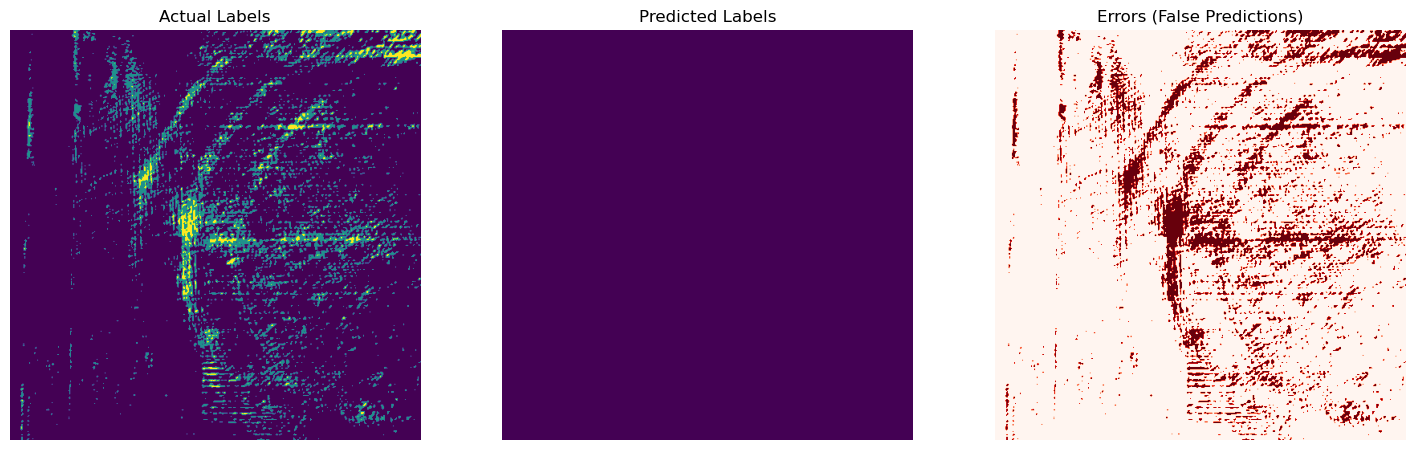

In [755]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, num_classes, sample_index=0):
    """
    可视化实际标签、预测标签以及错误预测的位置
    :param y_true: 实际标签，形状为 (batch_size, height, width, num_classes)
    :param y_pred: 预测标签，形状为 (batch_size, height, width, num_classes)
    :param num_classes: 类别数量
    :param sample_index: 要可视化的样本索引
    """
    # 将one-hot编码的标签转换为类别索引
    y_true_class = np.argmax(y_true, axis=-1)
    y_pred_class = np.argmax(y_pred, axis=-1)
    
    # 获取指定样本的实际标签和预测标签
    y_true_sample = y_true_class[sample_index]
    y_pred_sample = y_pred_class[sample_index]
    
    # 创建一个布尔数组来标识错误预测的位置
    errors = (y_true_sample != y_pred_sample)

    # 创建子图
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # 显示实际标签
    axes[0].imshow(y_true_sample, cmap='viridis')
    axes[0].set_title('Actual Labels')
    axes[0].axis('off')

    # 显示预测标签
    axes[1].imshow(y_pred_sample, cmap='viridis')
    axes[1].set_title('Predicted Labels')
    axes[1].axis('off')

    # 显示错误预测的位置
    axes[2].imshow(errors, cmap='Reds')
    axes[2].set_title('Errors (False Predictions)')
    axes[2].axis('off')

    plt.show()

# 示例使用


# 可视化第一个样本的实际标签、预测标签和错误预测的位置
plot_predictions(y_test, y_pred, num_classes=4, sample_index=0)
